## Projet Data Minig II

- **ELMAHDAOUI Abdelghani**
  
- **MEKRANY Yassine**

## Bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics 
import scikitplot as skplt
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

## I. Analyse Exploratoire des Données (AED)

## 1 : Chargement des Données et Identification des Variables

In [2]:
df=pd.read_csv("weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [3]:
df= df.sample(n=500, random_state=42)  # Réduire le dataframe à 1000 enregistrements

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
import pandas as pd
from IPython.display import display, Markdown

# Description des variables
variable_descriptions = {
    "Date": "Date des enregistrements météo (au format YYYY-MM-DD).",
    "Location": "Station météorologique où les mesures ont été prises.",
    "MinTemp": "Température minimale enregistrée pour la journée (en degrés Celsius).",
    "MaxTemp": "Température maximale enregistrée pour la journée (en degrés Celsius).",
    "Rainfall": "Quantité de précipitations enregistrées pour la journée (en mm).",
    "Evaporation": "Quantité d'évaporation (en mm).",
    "Sunshine": "Durée d'ensoleillement (en heures).",
    "WindGustDir": "Direction du vent en rafale la plus forte.",
    "WindGustSpeed": "Vitesse du vent en rafale la plus forte (en km/h).",
    "WindDir9am": "Direction du vent à 9 heures du matin.",
    "WindDir3pm": "Direction du vent à 15 heures.",
    "WindSpeed9am": "Vitesse du vent à 9 heures du matin (en km/h).",
    "WindSpeed3pm": "Vitesse du vent à 15 heures (en km/h).",
    "Humidity9am": "Humidité relative à 9 heures du matin (en %).",
    "Humidity3pm": "Humidité relative à 15 heures (en %).",
    "Pressure9am": "Pression atmosphérique à 9 heures du matin (en hPa).",
    "Pressure3pm": "Pression atmosphérique à 15 heures (en hPa).",
    "Cloud9am": "Nébulosité à 9 heures du matin (en octas).",
    "Cloud3pm": "Nébulosité à 15 heures (en octas).",
    "Temp9am": "Température à 9 heures du matin (en degrés Celsius).",
    "Temp3pm": "Température à 15 heures (en degrés Celsius).",
    "RainToday": "Indicateur de pluie pour la journée ('Yes' si la pluie est mesurée, sinon 'No').",
    "RainTomorrow": "Indicateur de pluie pour le lendemain ('Yes' si la pluie est mesurée, sinon 'No')."
}

# Fonction pour afficher les descriptions des variables
def display_variable_descriptions(descriptions):
    markdown_str = "## Description des Variables\n"
    markdown_str += "### Variables numériques :\n"
    for key, desc in descriptions.items():
        if key in ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]:
            markdown_str += f"- *{key}* : {desc} (Entrée)\n"
    markdown_str += "\n### Variables catégorielles :\n"
    for key, desc in descriptions.items():
        if key in ["Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]:
            markdown_str += f"- *{key}* : {desc} (Entrée)\n"
    markdown_str += "\n### Variable cible :\n"
    for key, desc in descriptions.items():
        if key == "RainTomorrow":
            markdown_str += f"- *{key}* : {desc} (Sortie)\n"
    
    display(Markdown(markdown_str))

# Appel de la fonction pour afficher les descriptions des variables
display_variable_descriptions(variable_descriptions)

## Description des Variables
### Variables numériques :
- *MinTemp* : Température minimale enregistrée pour la journée (en degrés Celsius). (Entrée)
- *MaxTemp* : Température maximale enregistrée pour la journée (en degrés Celsius). (Entrée)
- *Rainfall* : Quantité de précipitations enregistrées pour la journée (en mm). (Entrée)
- *Evaporation* : Quantité d'évaporation (en mm). (Entrée)
- *Sunshine* : Durée d'ensoleillement (en heures). (Entrée)
- *WindGustSpeed* : Vitesse du vent en rafale la plus forte (en km/h). (Entrée)
- *WindSpeed9am* : Vitesse du vent à 9 heures du matin (en km/h). (Entrée)
- *WindSpeed3pm* : Vitesse du vent à 15 heures (en km/h). (Entrée)
- *Humidity9am* : Humidité relative à 9 heures du matin (en %). (Entrée)
- *Humidity3pm* : Humidité relative à 15 heures (en %). (Entrée)
- *Pressure9am* : Pression atmosphérique à 9 heures du matin (en hPa). (Entrée)
- *Pressure3pm* : Pression atmosphérique à 15 heures (en hPa). (Entrée)
- *Cloud9am* : Nébulosité à 9 heures du matin (en octas). (Entrée)
- *Cloud3pm* : Nébulosité à 15 heures (en octas). (Entrée)
- *Temp9am* : Température à 9 heures du matin (en degrés Celsius). (Entrée)
- *Temp3pm* : Température à 15 heures (en degrés Celsius). (Entrée)

### Variables catégorielles :
- *Date* : Date des enregistrements météo (au format YYYY-MM-DD). (Entrée)
- *Location* : Station météorologique où les mesures ont été prises. (Entrée)
- *WindGustDir* : Direction du vent en rafale la plus forte. (Entrée)
- *WindDir9am* : Direction du vent à 9 heures du matin. (Entrée)
- *WindDir3pm* : Direction du vent à 15 heures. (Entrée)
- *RainToday* : Indicateur de pluie pour la journée ('Yes' si la pluie est mesurée, sinon 'No'). (Entrée)

### Variable cible :
- *RainTomorrow* : Indicateur de pluie pour le lendemain ('Yes' si la pluie est mesurée, sinon 'No'). (Sortie)


In [6]:
# Séparer les colonnes en variables numériques et catégorielles
variables_numeriques = df.select_dtypes(include=['float64', 'int64'])
variables_categorielles = df.select_dtypes(include=['object'])

message = "\033[1mVariables numériques :\033[0m\n"  # Mettre le texte en gras
message += "\n".join(variables_numeriques)

message += "\n\n\033[1mVariables catégorielles :\033[0m\n"  # Mettre le texte en gras
message += "\n".join(variables_categorielles)

print(message)


Variables numériques :
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm

Variables catégorielles :
Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


## 2 : Statistiques sur les Attributs Numériques

In [7]:
# Calculer les statistiques descriptives
statistics = variables_numeriques.describe().round(2)  # Arrondir les valeurs à deux décimales

# Transposer le DataFrame pour avoir une disposition plus conviviale
statistics = statistics.T

# Convertir les statistiques descriptives en format de tableau
table = tabulate(statistics, headers=statistics.columns, tablefmt='fancy_grid')

# Afficher le tableau des statistiques descriptives
print("Statistiques descriptives pour les attributs numériques :\n")
print(table)


Statistiques descriptives pour les attributs numériques :

╒═══════════════╤═════════╤═════════╤═══════╤═══════╤═════════╤═════════╤═════════╤════════╕
│               │   count │    mean │   std │   min │     25% │     50% │     75% │    max │
╞═══════════════╪═════════╪═════════╪═══════╪═══════╪═════════╪═════════╪═════════╪════════╡
│ MinTemp       │     493 │   12.3  │  6.5  │  -3.9 │    7.7  │   12.2  │   17    │   30.7 │
├───────────────┼─────────┼─────────┼───────┼───────┼─────────┼─────────┼─────────┼────────┤
│ MaxTemp       │     496 │   23.4  │  7.23 │  -0.3 │   18.5  │   23.05 │   28.82 │   42.2 │
├───────────────┼─────────┼─────────┼───────┼───────┼─────────┼─────────┼─────────┼────────┤
│ Rainfall      │     486 │    2.27 │  7.7  │   0   │    0    │    0    │    0.8  │   83.8 │
├───────────────┼─────────┼─────────┼───────┼───────┼─────────┼─────────┼─────────┼────────┤
│ Evaporation   │     292 │    5.45 │  3.89 │   0   │    2.55 │    4.8  │    7.4  │   28.6 │
├──────────

- **Matrice de corrélation :**

In [9]:
# Calculer la matrice de corrélation
corr_matrix = variables_numeriques.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

## 3 : Analyse Univariée 

- **Variables Numériques :**

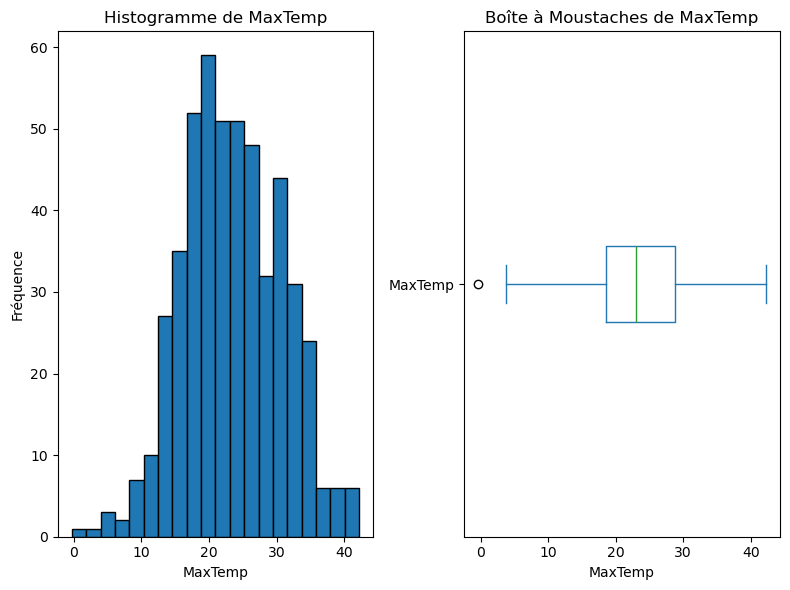

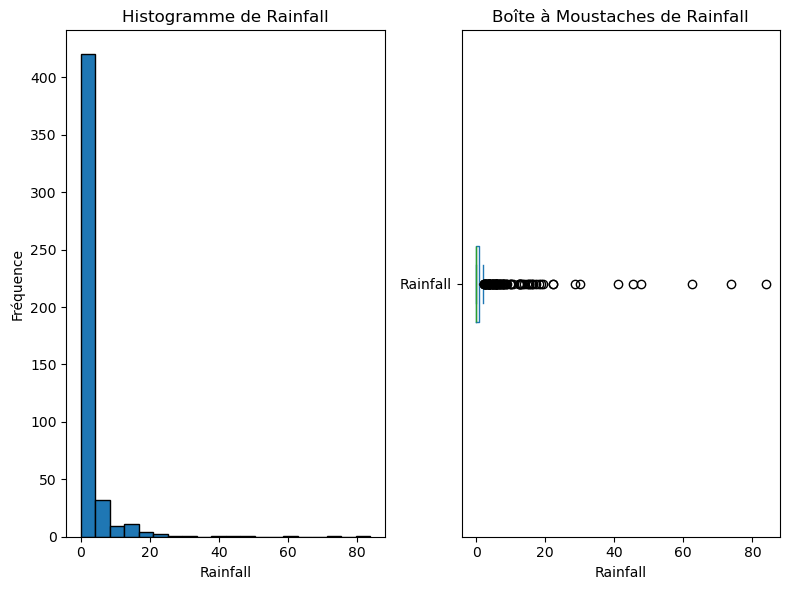

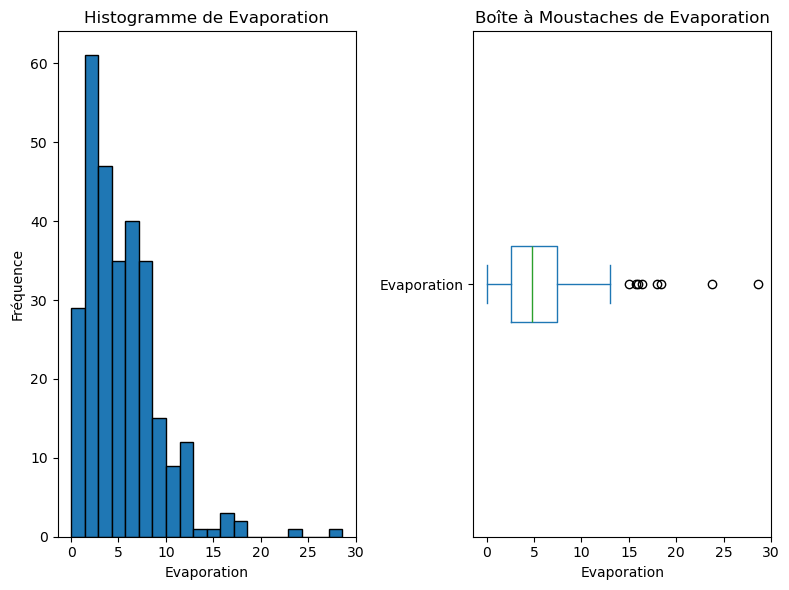

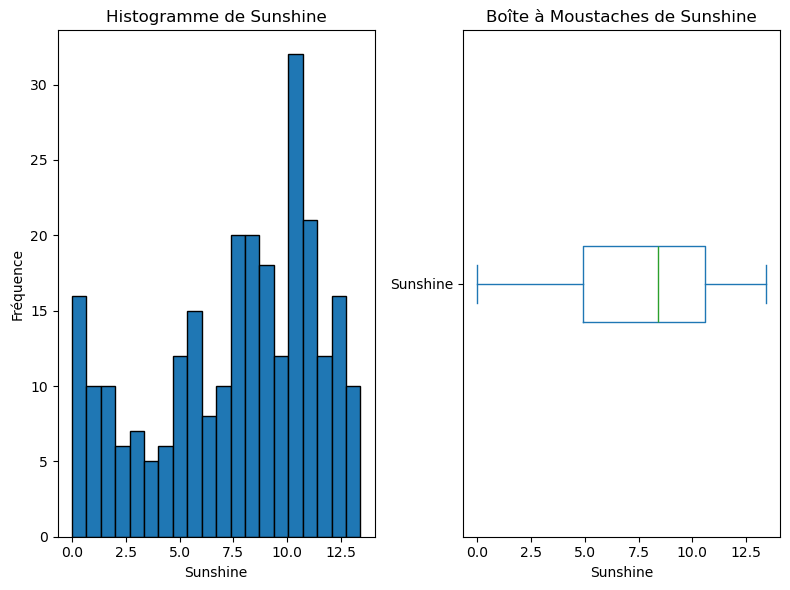

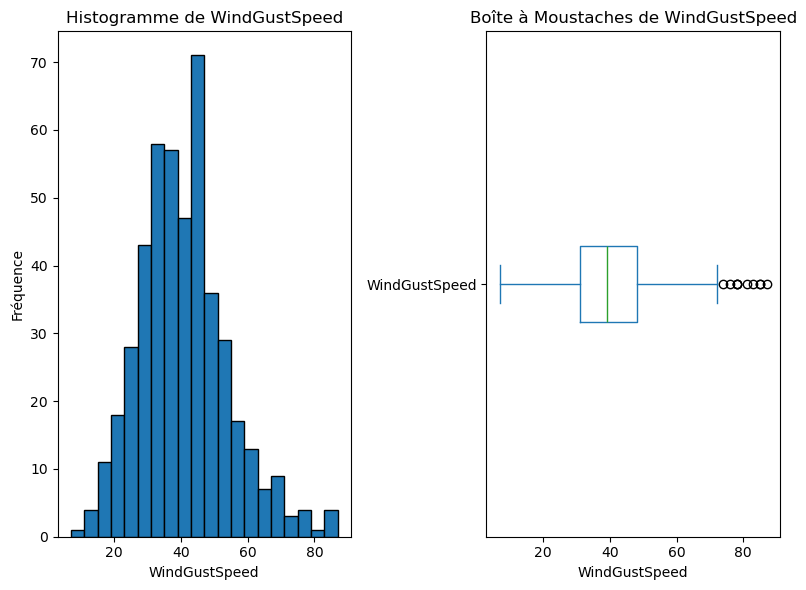

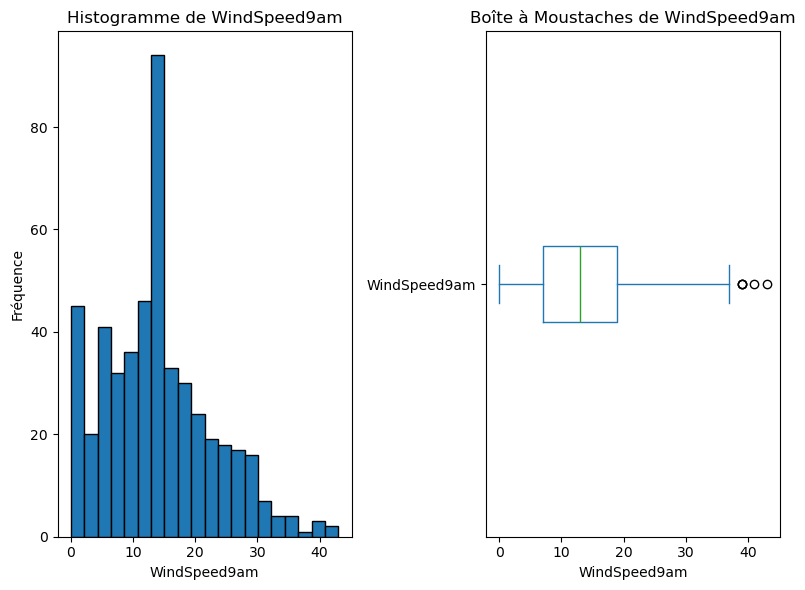

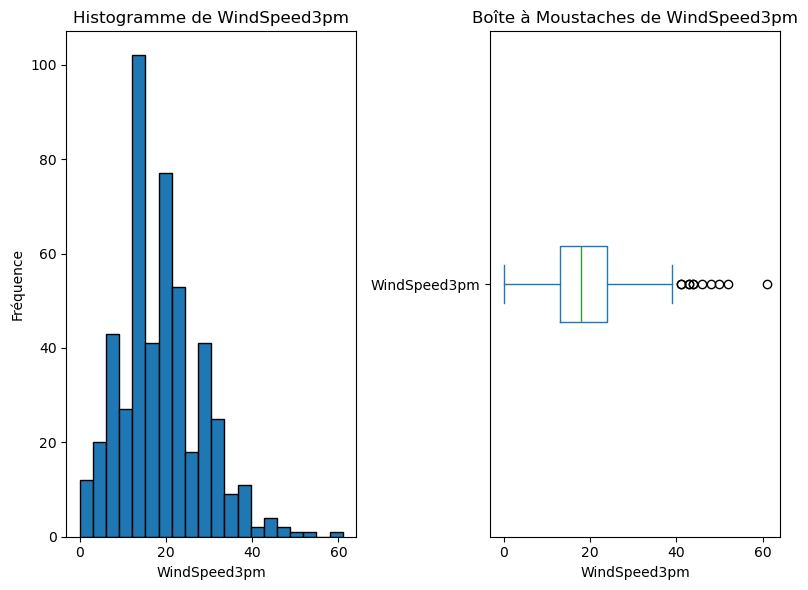

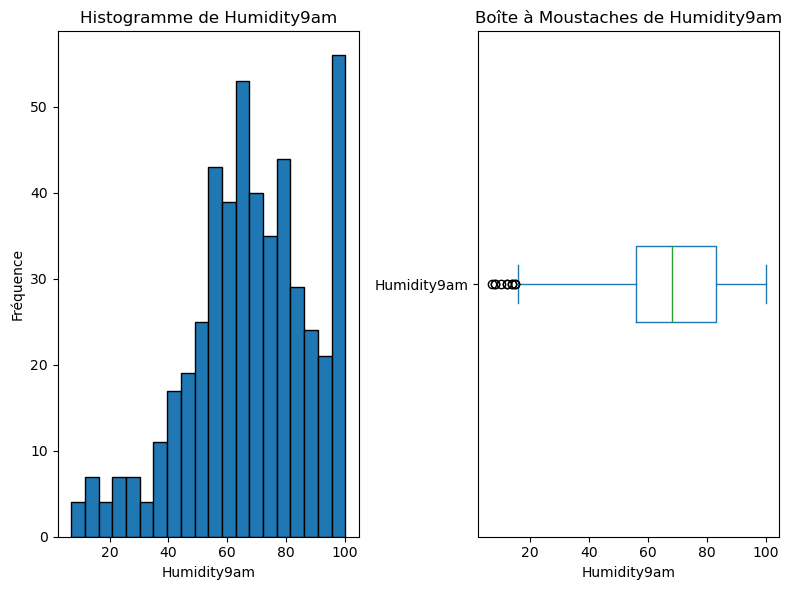

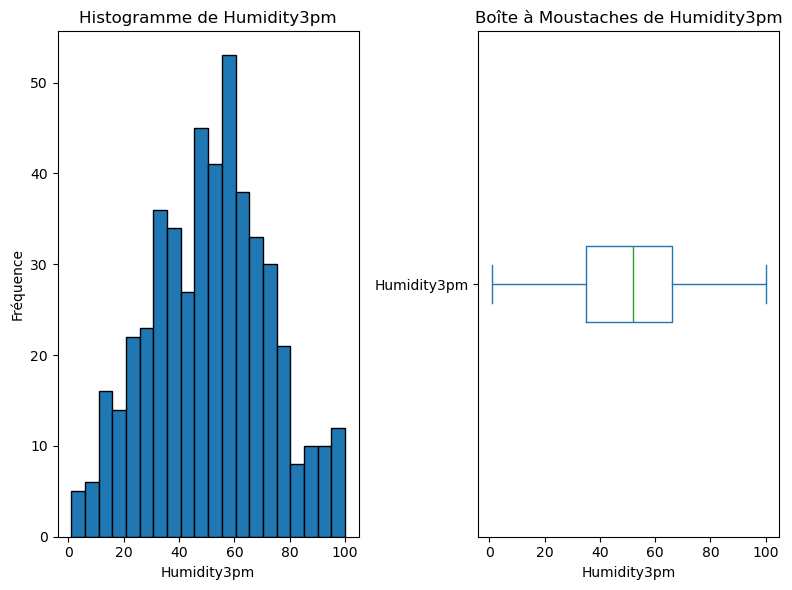

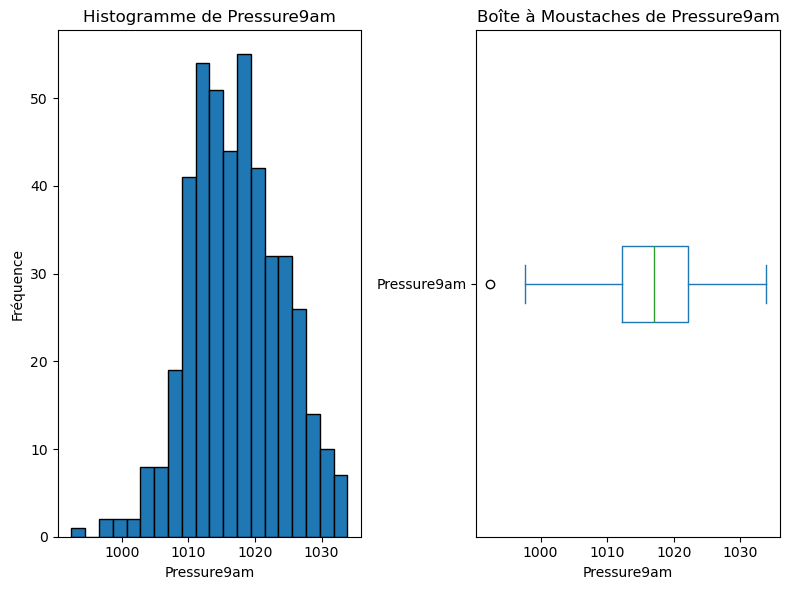

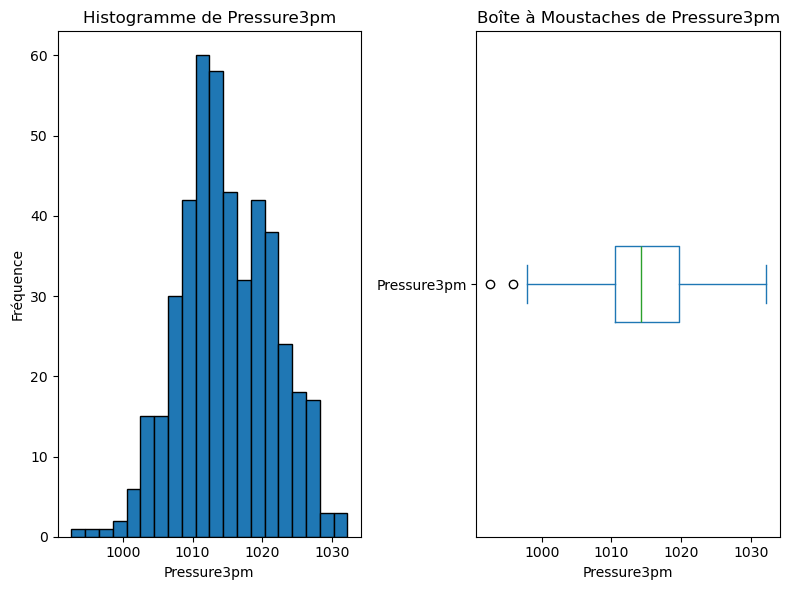

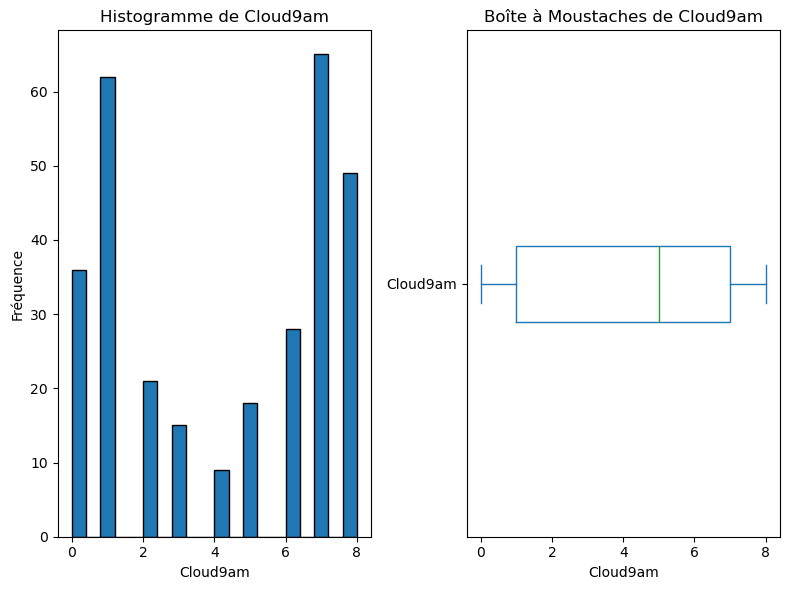

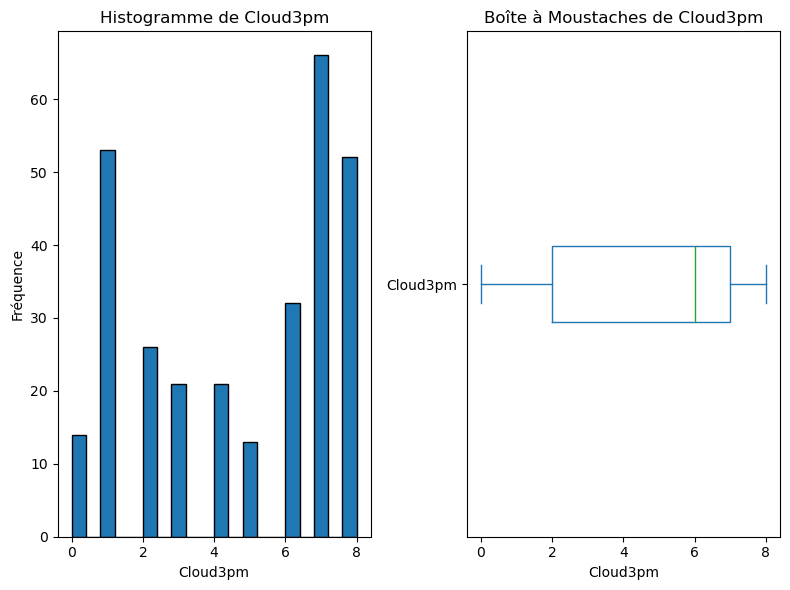

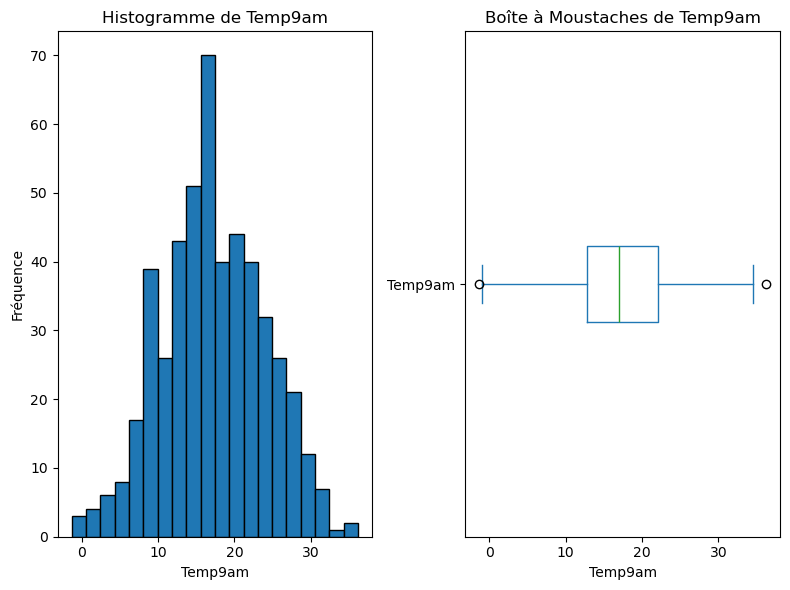

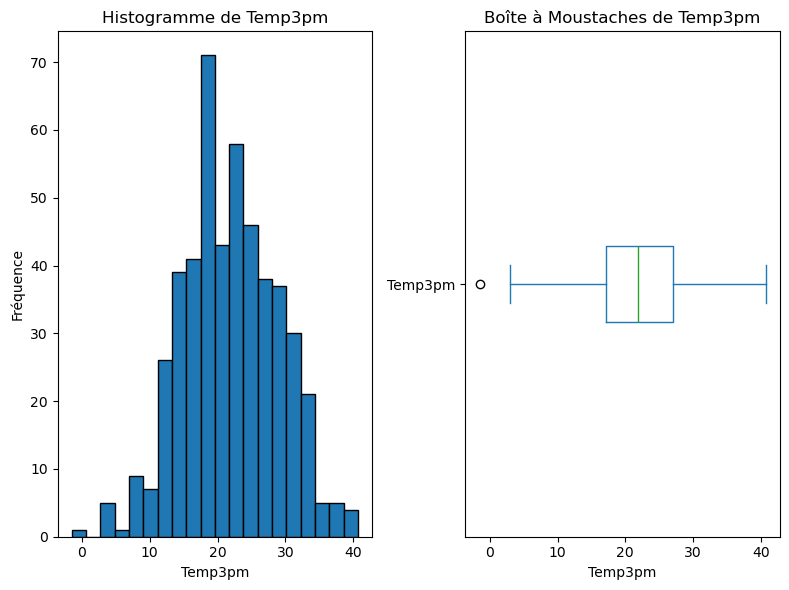

In [10]:
# Construire des histogrammes et des boîtes à moustaches pour chaque variable numérique
for col in variables_numeriques:
    plt.figure(figsize=(8, 6))

    # Histogramme
    plt.subplot(1, 2, 1)
    df[col].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

    # Boîte à moustaches (boxplot)
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box', vert=False)
    plt.title(f'Boîte à Moustaches de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


- **Variables Catégoriques :**

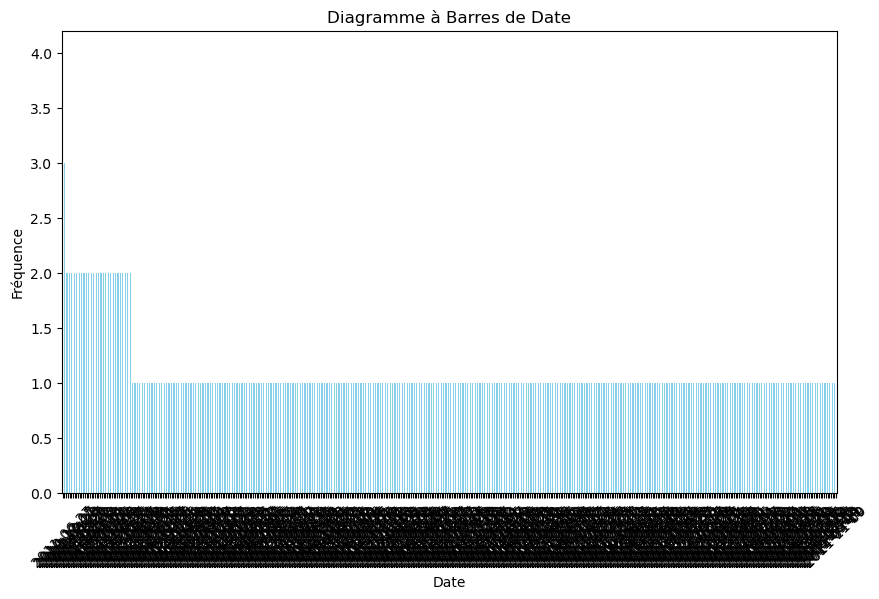

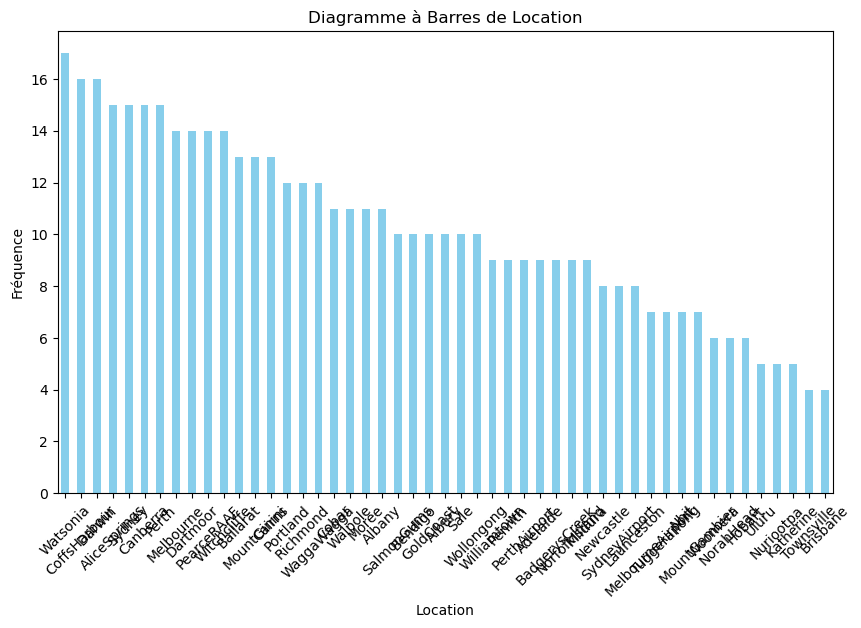

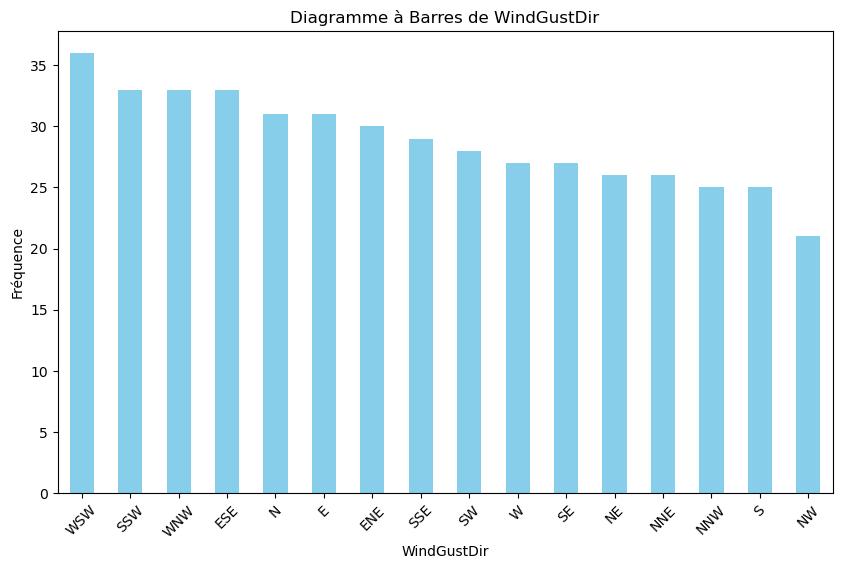

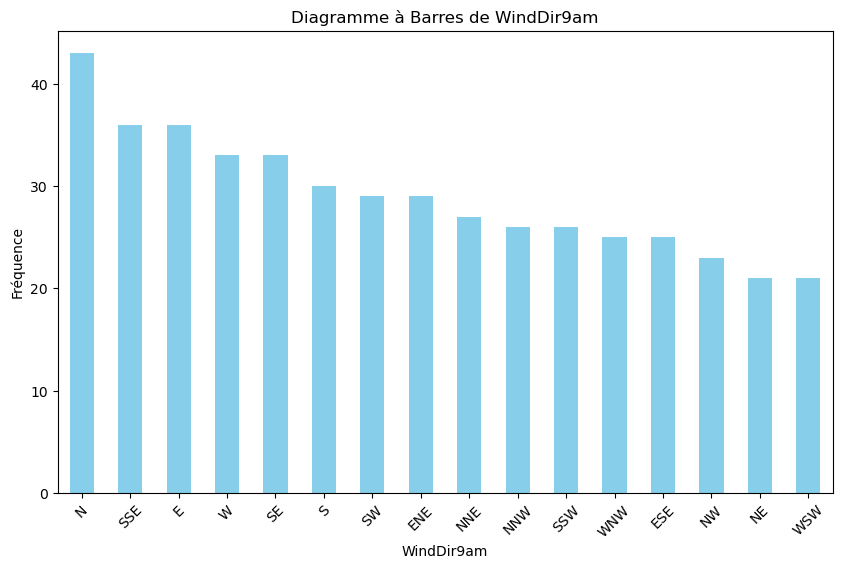

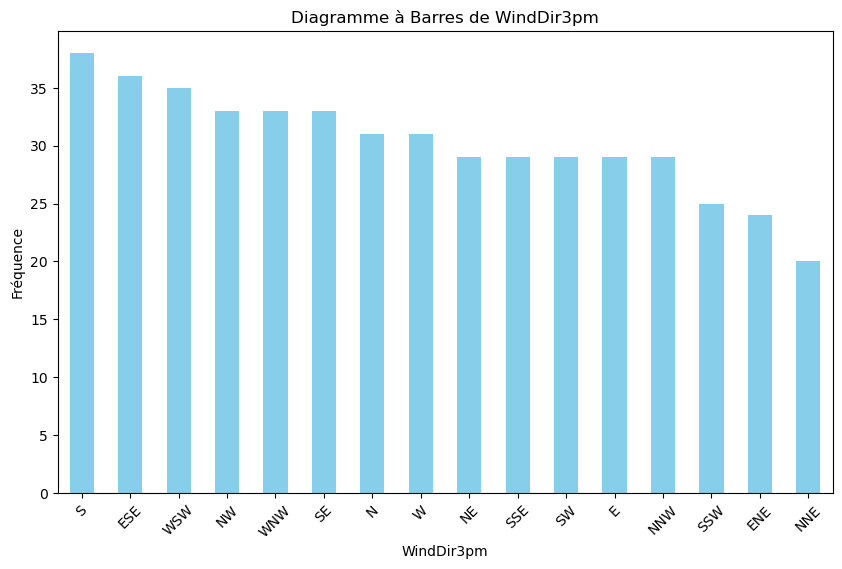

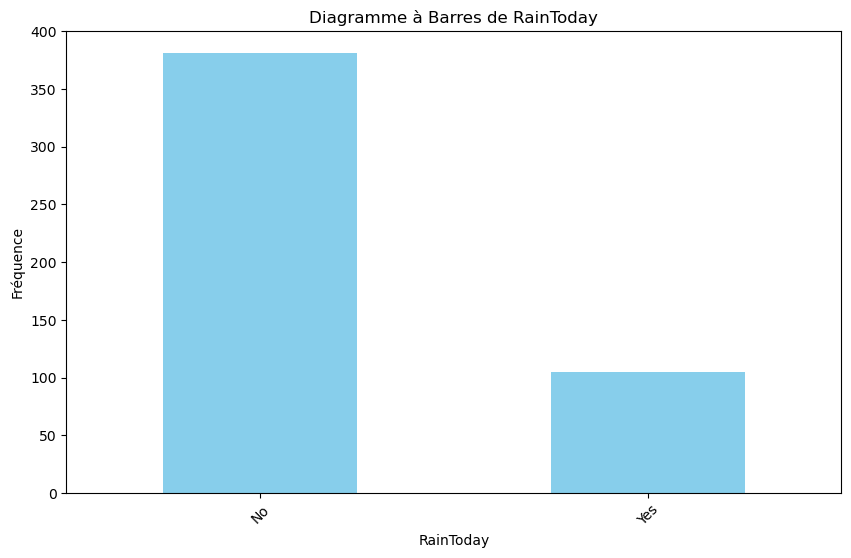

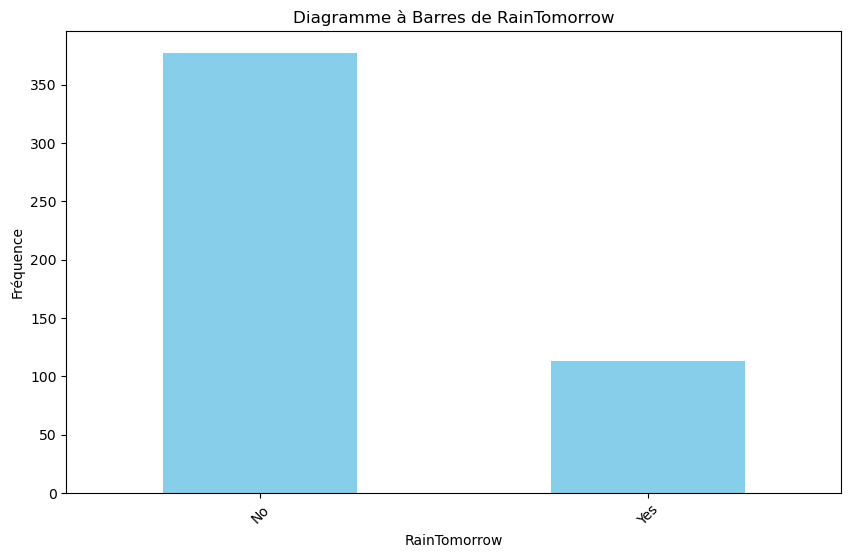

In [11]:
# Construire un diagramme à barres pour chaque variable catégorique
for col in variables_categorielles:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Diagramme à Barres de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.show()


## 4 : Analyse Bi-Variée 

- **Continu & Continu (Matrice de Nuages de Points) :**

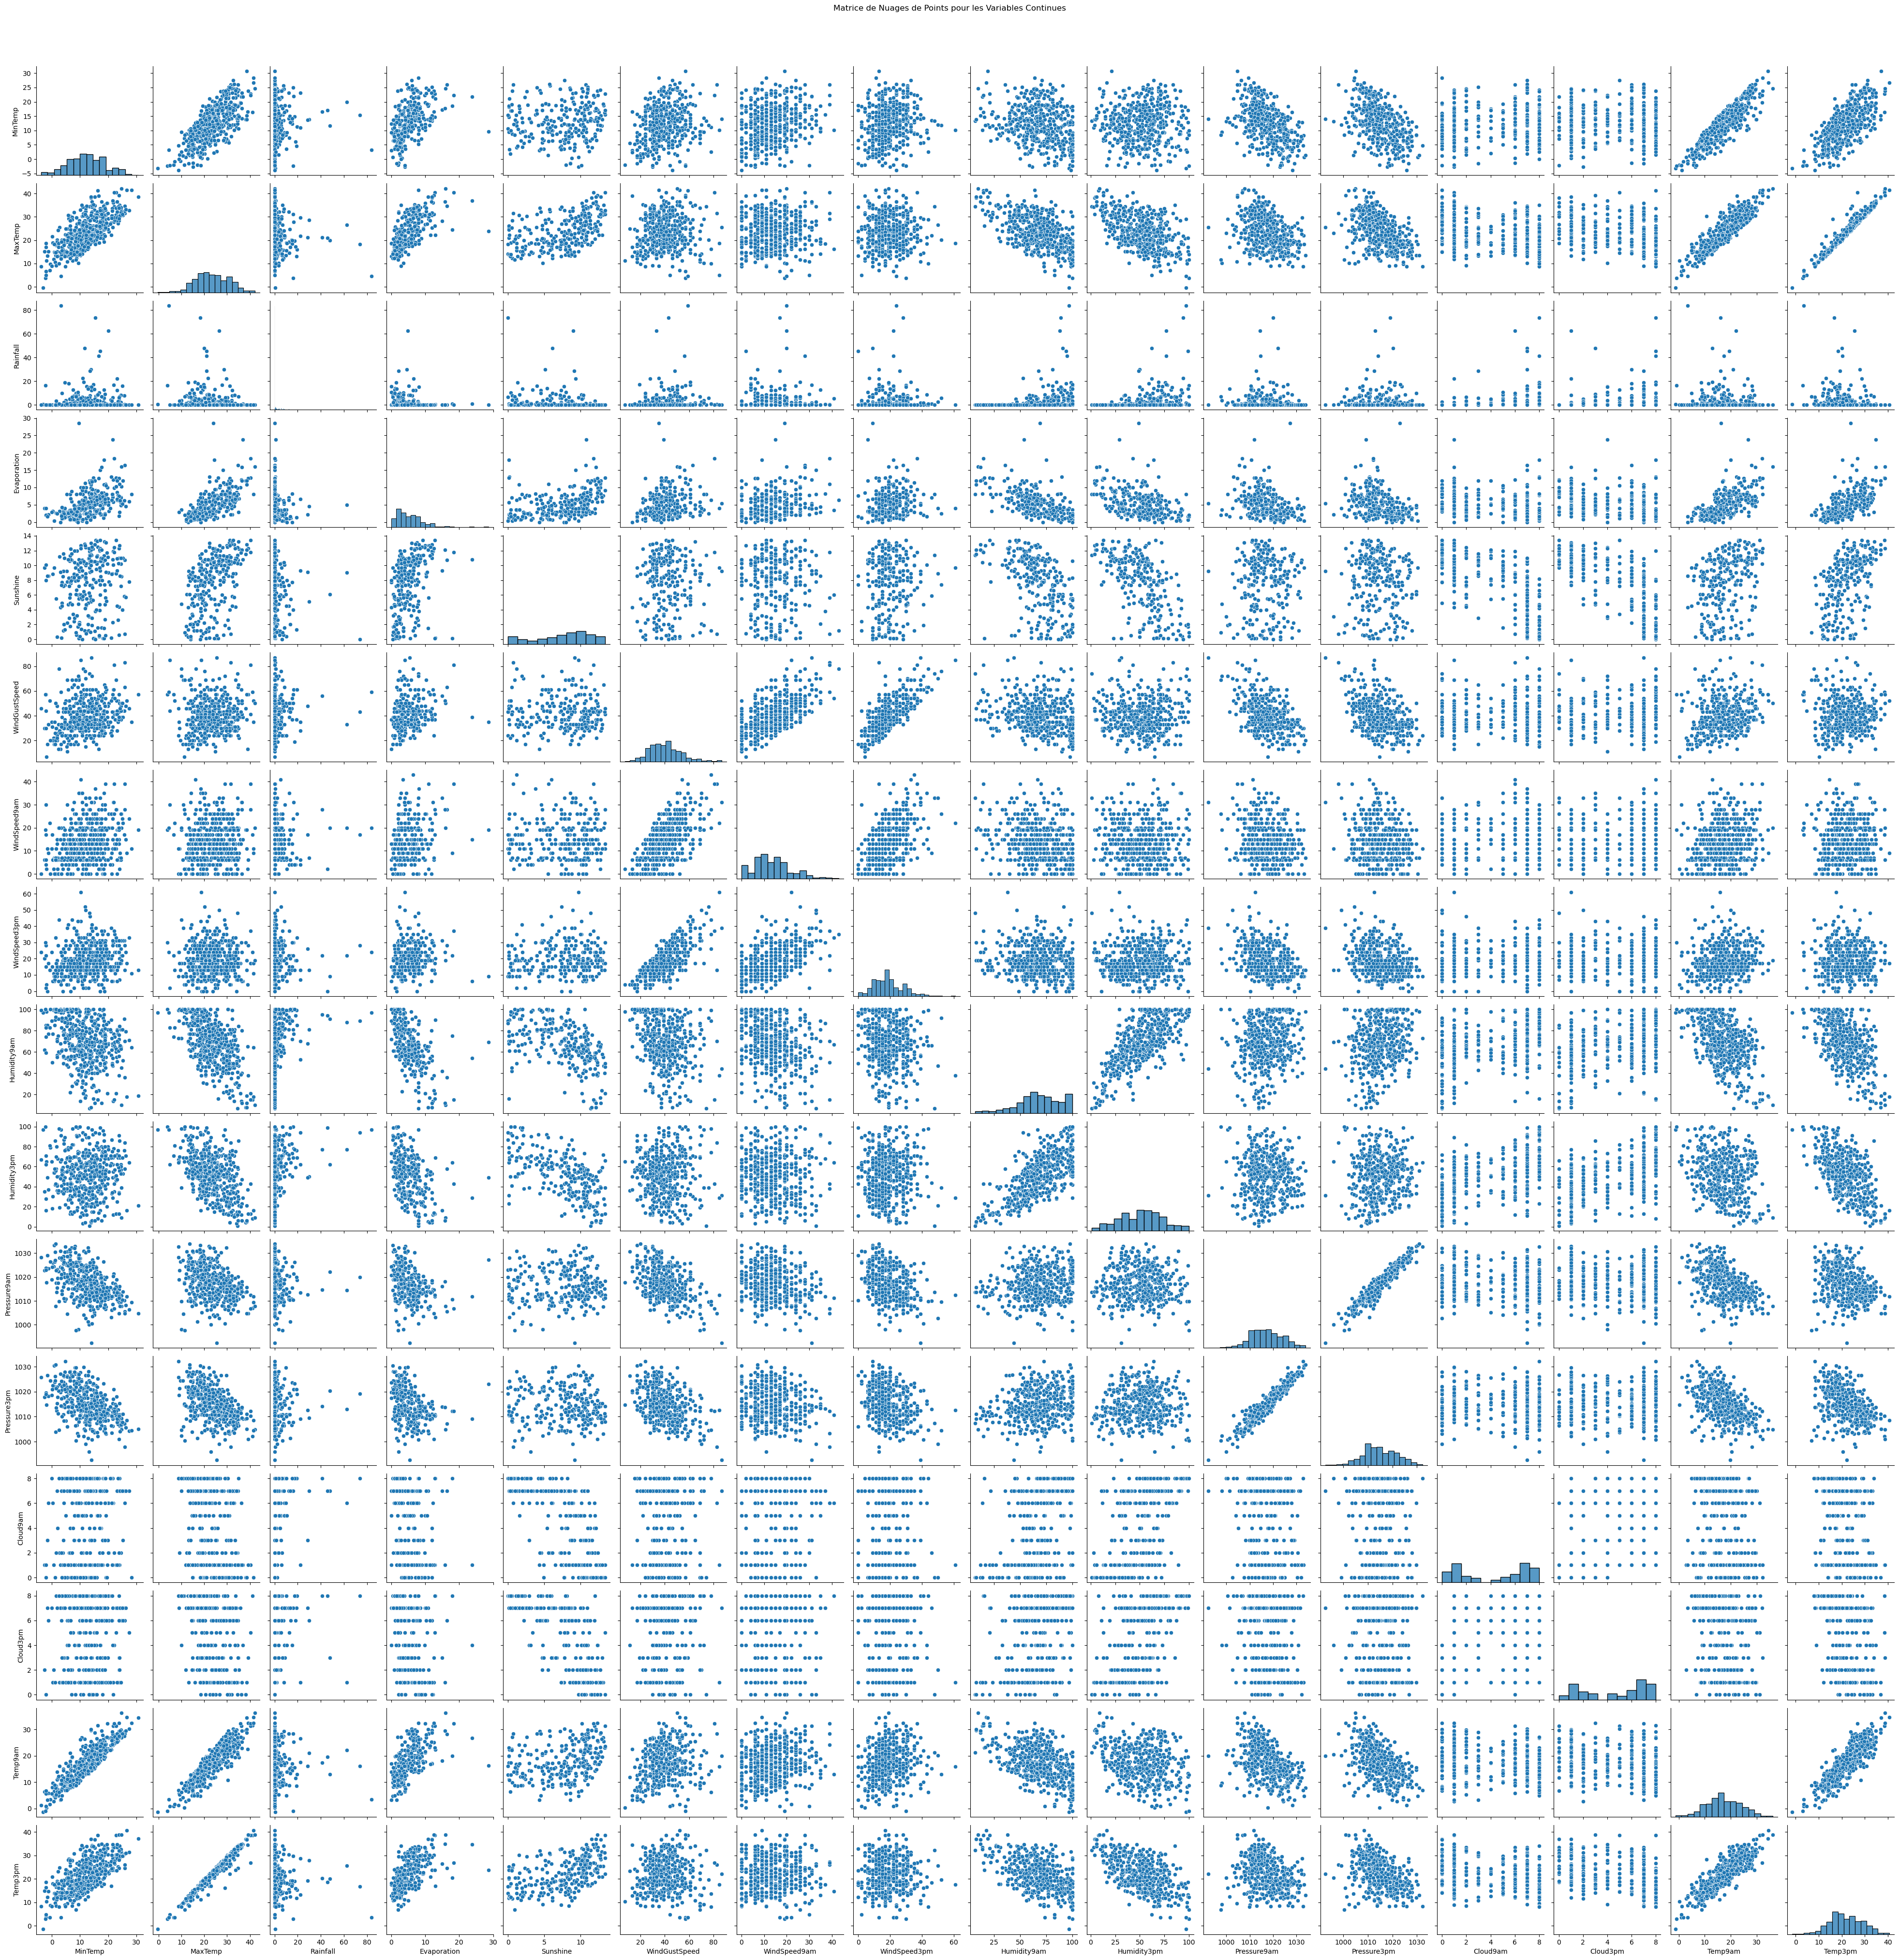

In [12]:
# Construire une matrice de nuages de points pour les paires de variables continues
sns.pairplot(variables_numeriques)
plt.suptitle('Matrice de Nuages de Points pour les Variables Continues', y=1.02)
plt.show()

- **Catégorique & Catégorique (Diagramme à Barres Empilées) :**

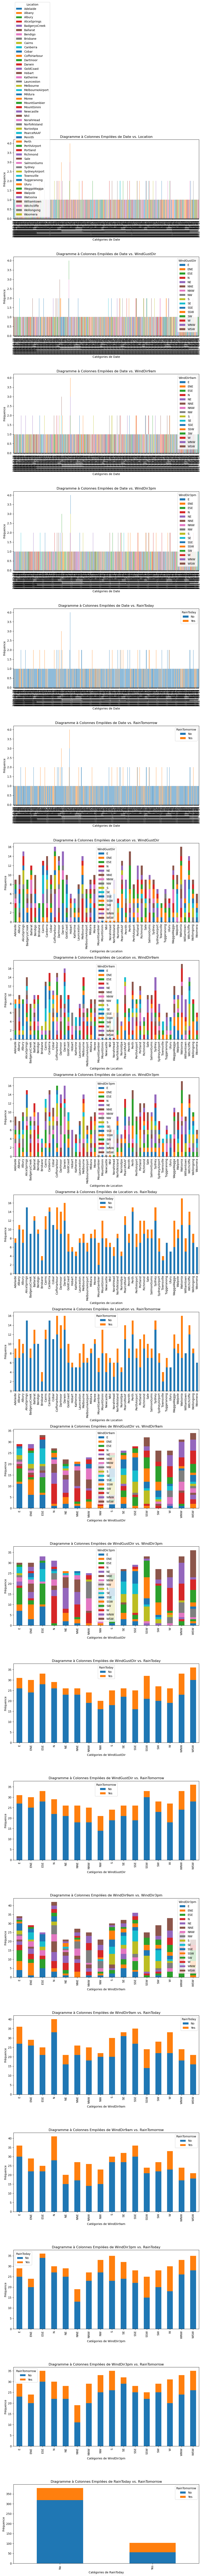

In [13]:
# Sélectionner les variables catégorielles du dataframe
variables_categorielles = df.select_dtypes(include=['object'])

# Liste des paires de variables catégorielles à comparer
pairs = [(variables_categorielles.columns[i], variables_categorielles.columns[j]) 
         for i in range(len(variables_categorielles.columns))
         for j in range(i + 1, len(variables_categorielles.columns))]

# Créer un diagramme à colonnes empilées pour chaque paire de variables catégorielles
num_pairs = len(pairs)
fig, axes = plt.subplots(nrows=num_pairs, ncols=1, figsize=(10, 6*num_pairs))

for i, (var1, var2) in enumerate(pairs):
    # Créer un tableau croisé des deux variables catégorielles
    ct = pd.crosstab(variables_categorielles[var1], variables_categorielles[var2])
    
    # Plotter le diagramme à colonnes empilées (stacked bar chart)
    ct.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Diagramme à Colonnes Empilées de {var1} vs. {var2}')
    axes[i].set_xlabel(f'Catégories de {var1}')
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


- **Catégorique & Continu (Diagrammes en Boîte et Diagrammes Swarm) :**

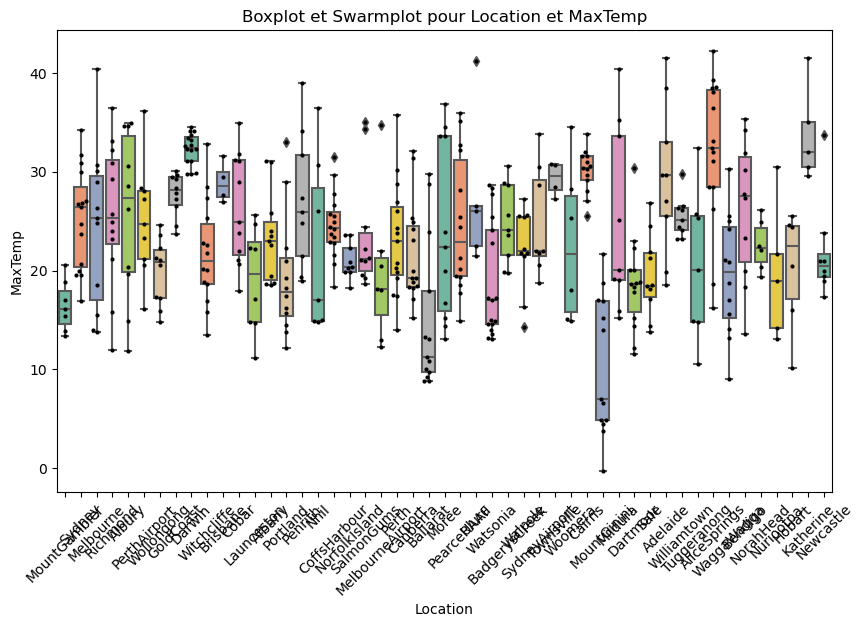

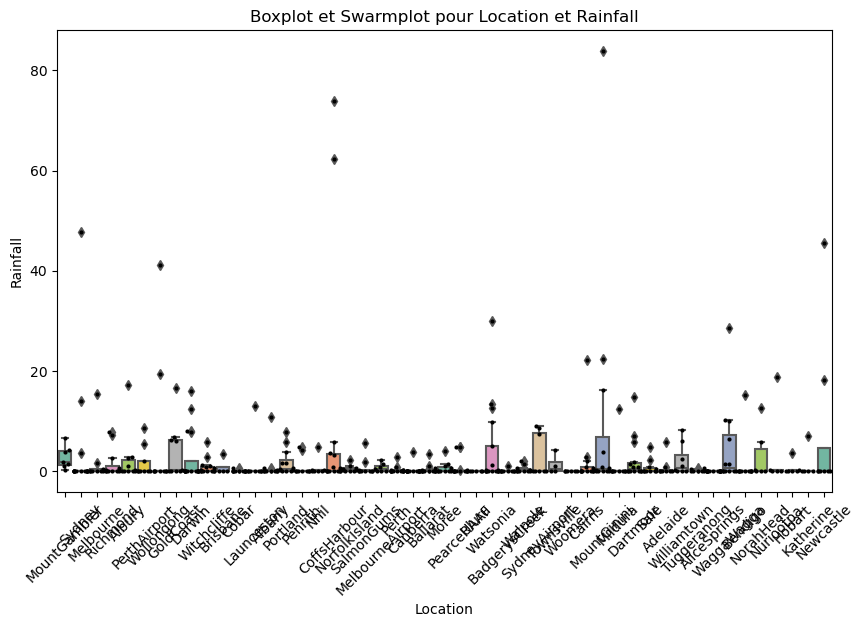

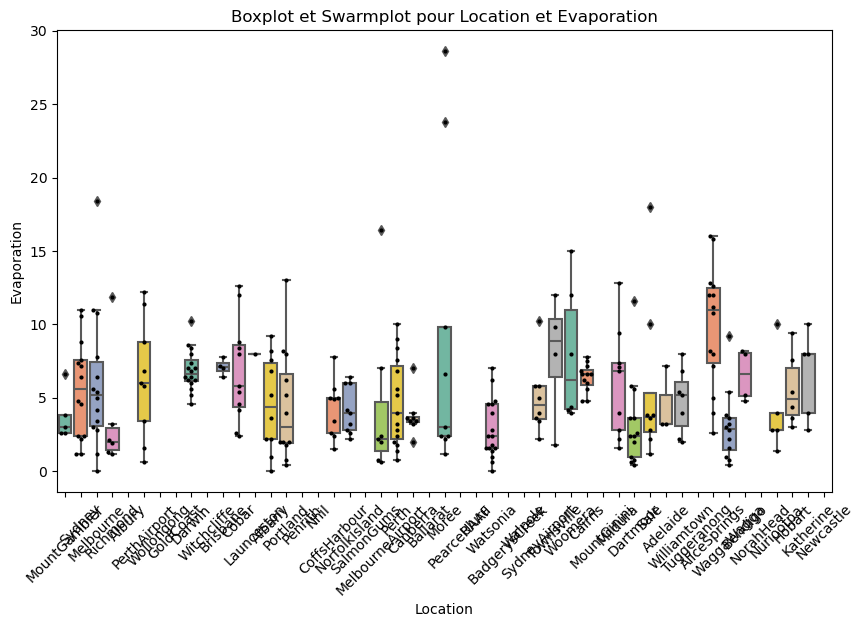

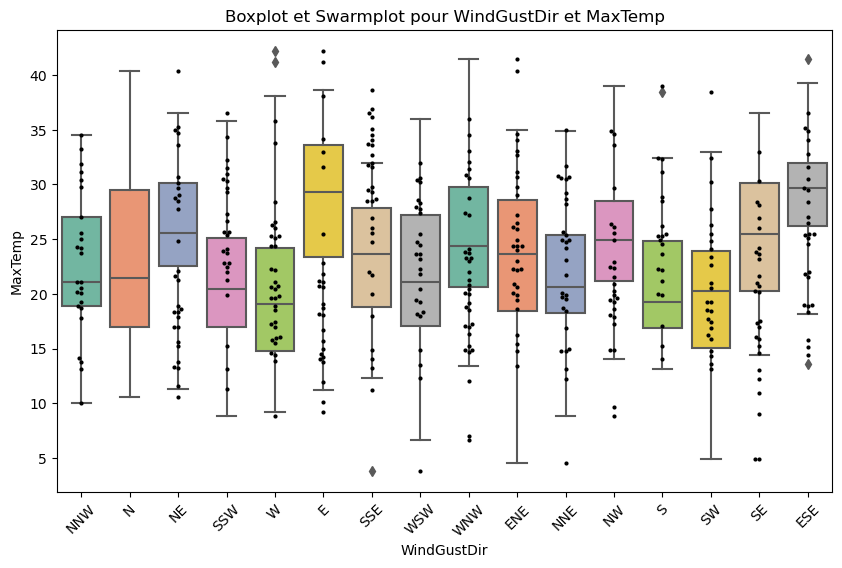

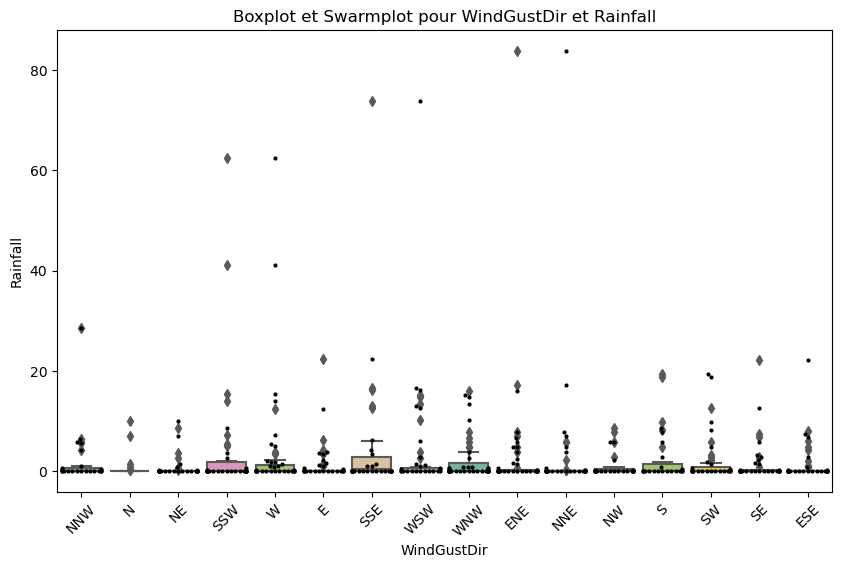

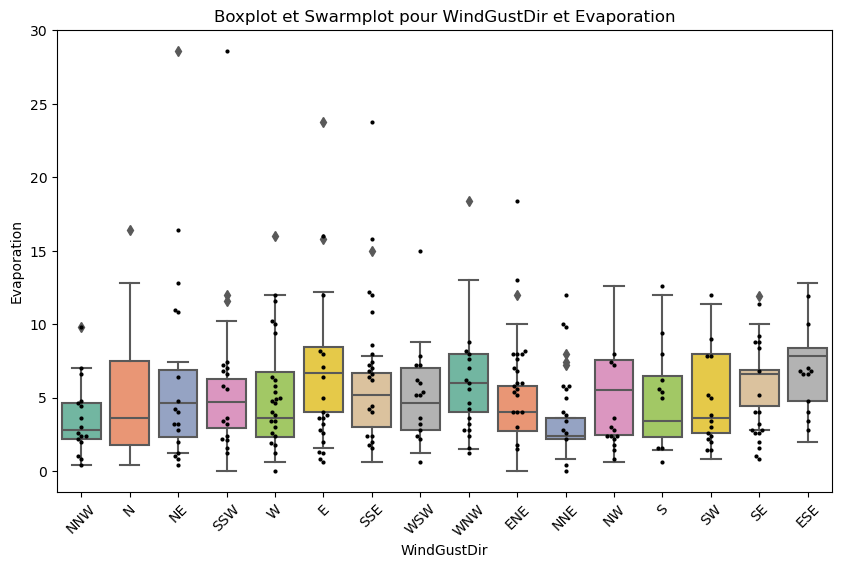

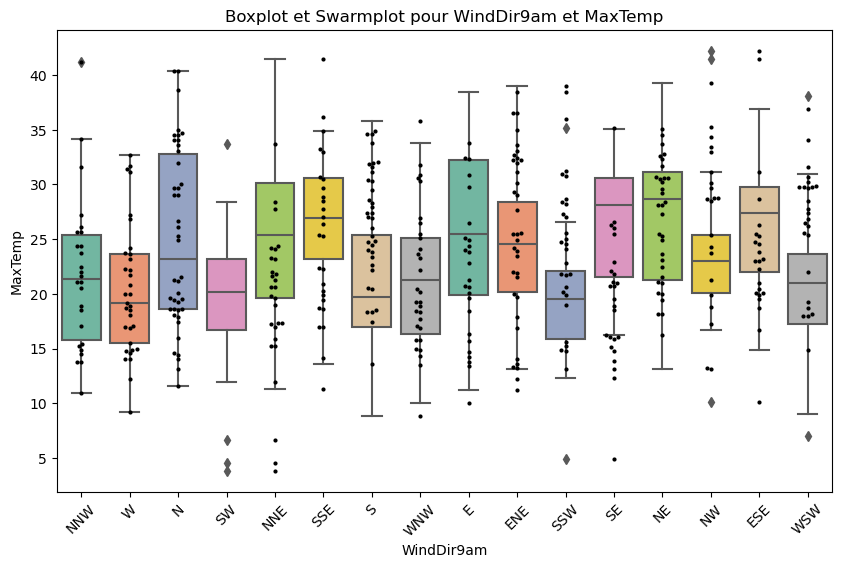

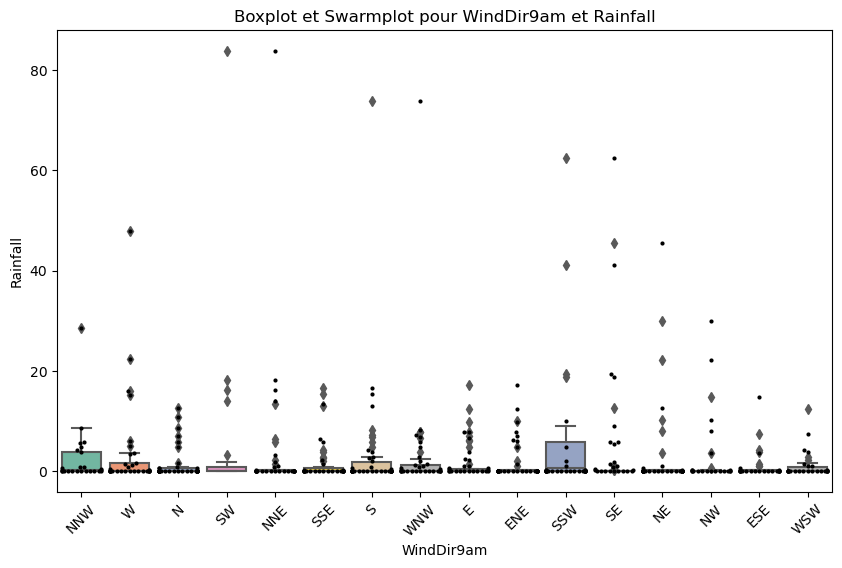

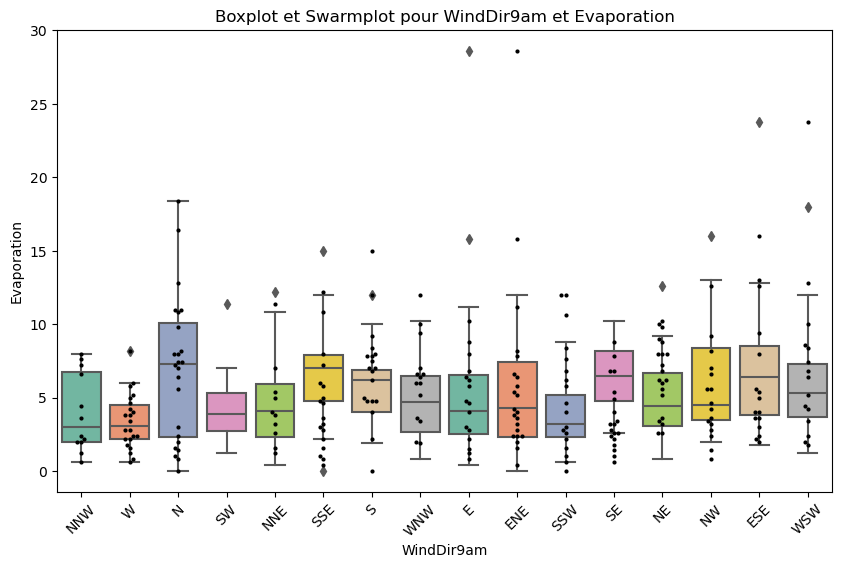

In [14]:
vc = variables_categorielles.columns[1:4]
vn = variables_numeriques.columns[1:4]

for cat_column in vc:
    for num_column in vn:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_column, y=num_column, data=df, palette='Set2')
        sns.swarmplot(x=cat_column, y=num_column, data=df, color='k', size=3)
        plt.title(f'Boxplot et Swarmplot pour {cat_column} et {num_column}')
        plt.xlabel(cat_column)
        plt.ylabel(num_column)
        plt.xticks(rotation=45)
        plt.show()


## 5 : Détection et traitement des valeurs manquantes :

- **Détection des valeurs manquantes avant le traitement**

In [15]:
missing_values = df.isna().sum()
print(missing_values)

Date               0
Location           0
MinTemp            7
MaxTemp            4
Rainfall          14
Evaporation      208
Sunshine         234
WindGustDir       39
WindGustSpeed     39
WindDir9am        37
WindDir3pm        16
WindSpeed9am       8
WindSpeed3pm      10
Humidity9am       11
Humidity3pm       16
Pressure9am       50
Pressure3pm       49
Cloud9am         197
Cloud3pm         202
Temp9am            8
Temp3pm           13
RainToday         14
RainTomorrow      10
dtype: int64


- **pour variables numériques : Remplacer les valeurs manquantes par la médiane**

In [16]:
for col in variables_numeriques:
    if df[col].isna().any():  # Vérifier s'il y a des valeurs manquantes dans cette colonne
        median_value = df[col].median()  # Calculer la médiane
        df[col].fillna(median_value, inplace=True)  # Remplacer les valeurs manquantes par la médiane

- **pour variables categorielles : Remplacer les valeurs manquantes par la valeur la plus fréquente**

In [17]:
for col in variables_categorielles:
    if df[col].isna().any():  # Vérifier s'il y a des valeurs manquantes dans cette colonne
        most_frequent_value = df[col].mode()[0]  # Trouver la valeur la plus fréquente
        df[col].fillna(most_frequent_value, inplace=True)  # Remplacer les valeurs manquantes par la valeur la plus fréquente

- **Détection des valeurs manquantes après le traitement**

In [18]:
missing_values = df.isna().sum()
print(missing_values)

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


## 6 : Détection et traitement des valeurs aberrantes :

- **Détection des valeurs aberrantes:**

In [19]:
for variable in variables_numeriques.columns:
    # Calculer les quartiles et l'IQR pour la variable numérique
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculer les limites inférieure et supérieure pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Créer un masque booléen pour identifier les valeurs aberrantes
    outliers_mask = (df[variable] < lower_bound) | (df[variable] > upper_bound)
    
    # Filtrer les valeurs aberrantes pour la variable numérique spécifique
    outliers = df.loc[outliers_mask, variable]
    
    # Calculer le nombre de valeurs aberrantes pour la variable numérique
    num_outliers = outliers.shape[0]  # Nombre d'éléments dans la série outliers
    
    # Afficher le nombre de valeurs aberrantes pour la variable numérique
    print(f"{variable} : {num_outliers}")


MinTemp : 1
MaxTemp : 1
Rainfall : 96
Evaporation : 99
Sunshine : 204
WindGustSpeed : 22
WindSpeed9am : 5
WindSpeed3pm : 11
Humidity9am : 10
Humidity3pm : 0
Pressure9am : 5
Pressure3pm : 3
Cloud9am : 0
Cloud3pm : 14
Temp9am : 3
Temp3pm : 2


- **Traitement des valeurs aberrantes :**

In [20]:
Q1 = df[variables_numeriques.columns].quantile(0.25)
Q3 = df[variables_numeriques.columns].quantile(0.75)
IQR = Q3 - Q1

# Calcul des bornes inférieures et supérieures pour chaque colonne numérique
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remplacement des valeurs aberrantes dans chaque colonne numérique
for column in variables_numeriques.columns:
    median_value = df[column].median()  # Calcul de la médiane de la colonne
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound[column] or x > upper_bound[column] else x)

## 7 : Le feature engineering ou l'ingénierie des caractéristiques 

In [21]:
# Convertir la colonne Date en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Définir une fonction pour mapper les mois aux saisons
def map_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Créer une nouvelle colonne 'Season' en utilisant la fonction map
df['Season'] = df['Date'].dt.month.map(map_to_season)
df.drop(columns=['Date'], inplace=True)

In [22]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
100721  MountGambier     15.0     18.9       0.0          6.6       8.0   
30234         Sydney     13.1     26.8       0.0          4.6       8.4   
68427      Melbourne     19.0     29.0       0.0          4.8       8.4   
28624       Richmond     18.1     32.2       0.0          2.1       8.4   
31173         Sydney     13.9     19.6       0.0          4.8       8.4   
...              ...      ...      ...       ...          ...       ...   
116722    PearceRAAF     17.1     32.7       0.0          4.8       8.4   
43874     Wollongong     11.4     17.2       0.0          4.8       8.4   
82908       Dartmoor      8.5     11.6       0.0          2.0       8.4   
119913  PerthAirport     13.7     20.6       0.0          4.8       8.4   
79001       Watsonia     17.1     27.8       0.2          4.8       8.4   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  \
100721         NNW           54.0        NNW         NW  ...         64.0   
30234          WSW           39.0          W        WNW  ...         22.0   
68427            N           59.0          N          N  ...         38.0   
28624           NE           30.0          N         NE  ...         51.0   
31173          SSW           50.0         SW          S  ...         64.0   
...            ...            ...        ...        ...  ...          ...   
116722           E           46.0          E         SW  ...         39.0   
43874          WSW           44.0         SW        ESE  ...         50.0   
82908            N           39.0          N          W  ...        100.0   
119913         WSW           39.0        ENE        NNE  ...         50.0   
79001            N           56.0        NNE          N  ...         60.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
100721       1005.2       1003.7       4.0       5.0     17.3     17.6   
30234        1013.0       1009.0       0.0       1.0     16.9     25.9   
68427        1006.5       1003.4       5.0       6.0     24.2     27.2   
28624        1019.2       1014.6       5.0       6.0     20.9     31.6   
31173        1017.1       1018.4       7.0       6.0     15.5     19.1   
...             ...          ...       ...       ...      ...      ...   
116722       1011.2       1008.0       5.0       6.0     23.5     28.8   
43874        1020.2       1019.0       5.0       6.0     14.7     15.9   
82908        1017.1       1000.4       5.0       6.0      8.8      6.8   
119913       1023.0       1020.9       7.0       7.0     15.6     20.4   
79001        1008.0       1005.2       7.0       3.0     21.9     26.4   

        RainToday  RainTomorrow  Season  
100721        Yes           Yes  Spring  
30234          No            No  Spring  
68427          No            No  Winter  
28624          No            No  Spring  
31173         Yes            No  Autumn  
...           ...           ...     ...  
116722         No            No  Winter  
43874          No            No  Summer  
82908         Yes           Yes  Summer  
119913        Yes           Yes  Summer  
79001          No           Yes  Autumn  

[500 rows x 23 columns]

## II. Évaluation de Divers Modèles d'Apprentissage Automatique

## 1 : Sélection des Modèles :

In [23]:
# Sélectionner toutes les colonnes sauf la variable cible
X = df.drop('RainTomorrow', axis=1)

# Sélectionner la variable cible
y = df['RainTomorrow']
# Convertir les variables catégorielles en variables numériques en utilisant l'encodage one-hot
X_encoded = pd.get_dummies(X, drop_first=True)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

- **Arbre de décision :**

In [24]:
# Initialiser et entraîner le modèle avec des hyperparamètres par défaut
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Évaluer le modèle
train_accuracy = decision_tree.score(X_train, y_train)
test_accuracy = decision_tree.score(X_test, y_test)

print("Précision sur l'ensemble d'entraînement :", train_accuracy)
print("Précision sur l'ensemble de test :", test_accuracy)

Précision sur l'ensemble d'entraînement : 1.0
Précision sur l'ensemble de test : 0.8


- **Réseau de neurones :**

In [25]:
# Initialiser et entraîner le modèle de réseau de neurones avec des hyperparamètres par défaut
neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)

# Évaluer le modèle
train_accuracy = neural_network.score(X_train, y_train)
test_accuracy = neural_network.score(X_test, y_test)

print("Précision sur l'ensemble d'entraînement :", train_accuracy)
print("Précision sur l'ensemble de test :", test_accuracy)

Précision sur l'ensemble d'entraînement : 0.87
Précision sur l'ensemble de test : 0.8


- **Random Forest :**

In [26]:
# Initialiser et entraîner le modèle de forêt aléatoire avec des hyperparamètres par défaut
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Évaluer le modèle
train_accuracy = random_forest.score(X_train, y_train)
test_accuracy = random_forest.score(X_test, y_test)

print("Précision sur l'ensemble d'entraînement :", train_accuracy)
print("Précision sur l'ensemble de test :", test_accuracy)

Précision sur l'ensemble d'entraînement : 1.0
Précision sur l'ensemble de test : 0.82


- **SVM :**

In [27]:
# Initialiser et entraîner le modèle SVM avec des hyperparamètres par défaut
svm = SVC()
svm.fit(X_train, y_train)

# Évaluer le modèle
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

print("Précision sur l'ensemble d'entraînement :", train_accuracy)
print("Précision sur l'ensemble de test :", test_accuracy)

Précision sur l'ensemble d'entraînement : 0.7725
Précision sur l'ensemble de test : 0.78


## 2 : Hyperparameter Tuning:

- **RandomForest (RandomizedSearchCV) :**

In [41]:
# Définir le pipeline avec les étapes de prétraitement et le modèle RandomForestClassifier
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler()),  # Standardisation des données
    ('random_forest', RandomForestClassifier())  # Modèle RandomForestClassifier
])

# Définir les hyperparamètres à rechercher
param_dist = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [10, 20, 30, None],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__bootstrap': [True, False]
}

# Initialiser RandomizedSearchCV dans le pipeline
random_search_rf = RandomizedSearchCV(estimator=pipeline_rf, param_distributions=param_dist, n_iter=10, cv=3)
random_search_rf.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params_rf = random_search_rf.best_params_
print("Meilleurs Hyperparamètres (Random Forest):", best_params_rf)

Meilleurs Hyperparamètres (Random Forest): {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 4, 'random_forest__max_depth': 30, 'random_forest__bootstrap': False}


- **Arbre de décision (GridSearchCV) :**

In [43]:
# Définir le pipeline avec les étapes de prétraitement et le modèle DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler()),  # Standardisation des données
    ('decision_tree', DecisionTreeClassifier())  # Modèle DecisionTreeClassifier
])

# Définir la grille d'hyperparamètres à rechercher
param_grid_dt = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [None, 10, 20, 30, 40, 50],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4]
}

# Initialiser GridSearchCV dans le pipeline
grid_search_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, cv=3)
grid_search_dt.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params_dt = grid_search_dt.best_params_
print("Meilleurs Hyperparamètres (Decision Tree - Grid Search):", best_params_dt)

Meilleurs Hyperparamètres (Decision Tree - Grid Search): {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 40, 'decision_tree__min_samples_leaf': 2, 'decision_tree__min_samples_split': 2}


- **Arbre de décision (RandomizedSearchCV) :**

In [44]:
# Définir le pipeline avec les étapes de prétraitement et le modèle DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler()),  # Standardisation des données
    ('decision_tree', DecisionTreeClassifier())  # Modèle DecisionTreeClassifier
])

# Définir la distribution d'hyperparamètres à rechercher
param_dist_dt = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': stats.randint(10, 50),
    'decision_tree__min_samples_split': stats.randint(2, 20),
    'decision_tree__min_samples_leaf': stats.randint(1, 10)
}

# Initialiser RandomizedSearchCV dans le pipeline
random_search_dt = RandomizedSearchCV(estimator=pipeline_dt, param_distributions=param_dist_dt, n_iter=10, cv=3, random_state=42)
random_search_dt.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params_dt = random_search_dt.best_params_
print("Meilleurs Hyperparamètres (Decision Tree - Random Search):", best_params_dt)

Meilleurs Hyperparamètres (Decision Tree - Random Search): {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 30, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 13}


- **Réseau de neurones (GridSearchCV) :**

In [45]:
# Définir le pipeline avec les étapes de prétraitement et le modèle MLPClassifier
pipeline_mlp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler()),  # Standardisation des données
    ('mlp', MLPClassifier())  # Modèle MLPClassifier
])

# Définir la grille d'hyperparamètres à rechercher
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'invscaling'],
    'mlp__max_iter': [100]  # Ajouter max_iter à la grille
}

# Initialiser GridSearchCV dans le pipeline
grid_search_mlp = GridSearchCV(estimator=pipeline_mlp, param_grid=param_grid_mlp, cv=3)
grid_search_mlp.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params_mlp = grid_search_mlp.best_params_
print("Meilleurs Hyperparamètres (MLPClassifier - Grid Search):", best_params_mlp)

Meilleurs Hyperparamètres (MLPClassifier - Grid Search): {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 100, 'mlp__solver': 'sgd'}


- **Réseau de neurones (RandomizedSearchCV) :**

In [46]:
# Définir le pipeline avec les étapes de prétraitement et le modèle MLPClassifier
pipeline_mlp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler()),  # Standardisation des données
    ('mlp', MLPClassifier())  # Modèle MLPClassifier
])

# Définir la distribution d'hyperparamètres à rechercher
param_dist_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__alpha': stats.uniform(0.0001, 0.1),
    'mlp__learning_rate': ['constant', 'invscaling']
}

# Initialiser RandomizedSearchCV dans le pipeline
random_search_mlp = RandomizedSearchCV(estimator=pipeline_mlp, param_distributions=param_dist_mlp, n_iter=10, cv=3, random_state=42)
random_search_mlp.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params_mlp = random_search_mlp.best_params_
print("Meilleurs Hyperparamètres (MLPClassifier - Random Search):", best_params_mlp)

Meilleurs Hyperparamètres (MLPClassifier - Random Search): {'mlp__activation': 'relu', 'mlp__alpha': 0.061265316048828095, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'invscaling', 'mlp__solver': 'lbfgs'}


## 3 : Cross Validation

- **k-fold cross-validation :**

In [34]:
# Définir le nombre de folds pour la validation croisée
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialiser les modèles à évaluer
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)

# Liste des modèles à évaluer avec leur nom
models = [
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("SVM", svm),
    ("MLP", mlp)
]

# Dictionnaire pour stocker les performances de chaque modèle
model_scores = {}

# Effectuer la validation croisée pour chaque modèle
for model_name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model_scores[model_name] = scores
    print(f"{model_name} - Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

# Afficher les résultats
print("\nScores de Validation Croisée (Accuracy) :")
for model_name, scores in model_scores.items():
    print(f"{model_name}: {scores.mean():.4f} (±{scores.std():.4f})")

Decision Tree - Accuracy: 0.7725 (±0.0166)
Random Forest - Accuracy: 0.8250 (±0.0354)
SVM - Accuracy: 0.7725 (±0.0414)
MLP - Accuracy: 0.7875 (±0.0565)

Scores de Validation Croisée (Accuracy) :
Decision Tree: 0.7725 (±0.0166)
Random Forest: 0.8250 (±0.0354)
SVM: 0.7725 (±0.0414)
MLP: 0.7875 (±0.0565)


- **Evaluation des models :**

In [35]:
# Définir le nombre de plis pour la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Définir les modèles à évaluer avec probability=True pour SVC
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC(probability=True)),  # Utiliser SVC avec probability=True
    ("MLP", MLPClassifier())
]

# Définir les métriques de performance
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Dictionnaire pour stocker les scores de chaque modèle pour chaque métrique
metric_scores = {metric: {} for metric in scoring_metrics}

# Calculer les scores pour chaque modèle et chaque métrique
for model_name, model in models:
    for metric in scoring_metrics:
        if metric == 'precision':
            # Calculer les prédictions pour chaque pli de la validation croisée
            y_pred = cross_val_predict(model, X_train, y_train, cv=kf)
            # Calculer la précision pour chaque pli
            score = precision_score(y_train, y_pred, pos_label='Yes')
        elif metric == 'recall':
            y_pred = cross_val_predict(model, X_train, y_train, cv=kf)
            score = recall_score(y_train, y_pred, pos_label='Yes')
        elif metric == 'f1':
            y_pred = cross_val_predict(model, X_train, y_train, cv=kf)
            score = f1_score(y_train, y_pred, pos_label='Yes')
        elif metric == 'roc_auc':
            # Utiliser predict_proba pour obtenir les scores de probabilité pour ROC-AUC
            y_scores = cross_val_predict(model, X_train, y_train, cv=kf, method='predict_proba')[:, 1]
            score = roc_auc_score(y_train, y_scores)
        else:
            scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=metric)
            score = np.mean(scores)
        metric_scores[metric][model_name] = score

# Afficher les résultats
print("\nScores de Validation Croisée (Métriques de Performance) :")
for metric, scores in metric_scores.items():
    print(f"\n{metric.capitalize()} :")
    for model_name, score in scores.items():
        print(f"{model_name}: {score:.4f}")


Scores de Validation Croisée (Métriques de Performance) :

Accuracy :
Decision Tree: 0.7600
Random Forest: 0.8225
SVM: 0.7725
MLP: 0.8075

Precision :
Decision Tree: 0.4556
Random Forest: 0.7714
SVM: 0.0000
MLP: 0.5385

Recall :
Decision Tree: 0.4615
Random Forest: 0.2967
SVM: 0.0000
MLP: 0.4615

F1 :
Decision Tree: 0.4918
Random Forest: 0.4444
SVM: 0.0000
MLP: 0.4211

Roc_auc :
Decision Tree: 0.6660
Random Forest: 0.7789
SVM: 0.8140
MLP: 0.6376


## 4 : Méthodes d'Ensemble : Expérimentation avec Bagging, Boosting et Stacking

- **Bagging :**

In [36]:
# Initialiser les modèles de base
base_dt = DecisionTreeClassifier()
base_rf = RandomForestClassifier()
base_svc = SVC()
base_mlp = MLPClassifier()

# Initialiser les classificateurs Bagging pour chaque modèle de base
bagging_dt = BaggingClassifier(base_dt, n_estimators=10, random_state=42)
bagging_rf = BaggingClassifier(base_rf, n_estimators=10, random_state=42)
bagging_svc = BaggingClassifier(base_svc, n_estimators=10, random_state=42)
bagging_mlp = BaggingClassifier(base_mlp, n_estimators=10, random_state=42)

# Entraîner les classificateurs Bagging
bagging_dt.fit(X_train, y_train)
bagging_rf.fit(X_train, y_train)
bagging_svc.fit(X_train, y_train)
bagging_mlp.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_bagging_dt = bagging_dt.predict(X_test)
y_pred_bagging_rf = bagging_rf.predict(X_test)
y_pred_bagging_svc = bagging_svc.predict(X_test)
y_pred_bagging_mlp = bagging_mlp.predict(X_test)

# Calculer l'accuracy
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
accuracy_bagging_svc = accuracy_score(y_test, y_pred_bagging_svc)
accuracy_bagging_mlp = accuracy_score(y_test, y_pred_bagging_mlp)

print("Accuracy Bagging DecisionTreeClassifier:", accuracy_bagging_dt)
print("Accuracy Bagging RandomForestClassifier:", accuracy_bagging_rf)
print("Accuracy Bagging SVC:", accuracy_bagging_svc)
print("Accuracy Bagging MLPClassifier:", accuracy_bagging_mlp)


Accuracy Bagging DecisionTreeClassifier: 0.81
Accuracy Bagging RandomForestClassifier: 0.81
Accuracy Bagging SVC: 0.78
Accuracy Bagging MLPClassifier: 0.82


- **Boosting :**

In [37]:
# Initialiser le classificateur de base pour AdaBoost
base_dt = DecisionTreeClassifier(max_depth=2)

# Initialiser les classificateurs Boosting pour chaque modèle de base
boosting_dt = AdaBoostClassifier(base_dt, n_estimators=50, algorithm='SAMME.R', random_state=42)
boosting_rf = AdaBoostClassifier(base_rf, n_estimators=50, algorithm='SAMME.R', random_state=42)

# Entraîner les classificateurs Boosting
boosting_dt.fit(X_train, y_train)
boosting_rf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_boosting_dt = boosting_dt.predict(X_test)
y_pred_boosting_rf = boosting_rf.predict(X_test)

# Calculer l'accuracy
accuracy_boosting_dt = accuracy_score(y_test, y_pred_boosting_dt)
accuracy_boosting_rf = accuracy_score(y_test, y_pred_boosting_rf)

print("Accuracy Boosting DecisionTreeClassifier:", accuracy_boosting_dt)
print("Accuracy Boosting RandomForestClassifier:", accuracy_boosting_rf)


Accuracy Boosting DecisionTreeClassifier: 0.78
Accuracy Boosting RandomForestClassifier: 0.82


- **Stacking :**

In [38]:
# Initialiser les classificateurs pour la méthode de stacking
estimators = [
    ('dt', base_dt),
    ('rf', base_rf),
    ('svc', base_svc),
    ('mlp', base_mlp)
]

# Initialiser le modèle de stacking
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_stacking = stacking_model.predict(X_test)

# Calculer l'accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print("Accuracy Stacking:", accuracy_stacking)


Accuracy Stacking: 0.82
